### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [277]:
data.describe()

data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

2. Investigate the dataset for missing or problematic data.

In [5]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [4]:
# 1. Information in "car" columns is so little that we will just drop the column.
data = data[['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y']]

print(type(data))

data.columns

<class 'pandas.core.frame.DataFrame'>


Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [33]:
# Let's look at the information for other NaN columns
# There are five columns with numm values - Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
# And they all have a average range value for using the coupon from Never to more than eight times. 
# there is no clear way to substitute missing values and since the number of rows impacted are small, 605 in total, we will drop all those rows
print(data[ (data['Bar'].isnull()) | (data['CoffeeHouse'].isnull()) | (data['CarryAway'].isnull()) | (data['Restaurant20To50'].isnull()) | (data['RestaurantLessThan20'].isnull())].count())

data = data.dropna()

data.loc[:, 'Coupon_Acceptance'] = data['Y'].map({0:"Rejected", 1:"Accepted"})

data['Coupon_Acceptance'].unique()


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


array(['Accepted', 'Rejected'], dtype=object)

In [6]:
# Let's check what we have so far

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

In [7]:
# Print all the unique values for each column.

for col in data.columns:
#for col in ['destination']:
    rowinfo:list[str] = []

    for value in sorted(data.query(f"not {col}.isnull()")[col].unique()):
#        print(f"value: {value}")
        rowinfo.append(f"{value} ")

#    print(f"rowinfo: {rowinfo}")
    rowinfo_str= f"{col.capitalize()}: {', '.join(rowinfo)}"
    print(rowinfo_str)

Destination: Home , No Urgent Place , Work 
Passanger: Alone , Friend(s) , Kid(s) , Partner 
Weather: Rainy , Snowy , Sunny 
Temperature: 30 , 55 , 80 
Time: 10AM , 10PM , 2PM , 6PM , 7AM 
Coupon: Bar , Carry out & Take away , Coffee House , Restaurant(20-50) , Restaurant(<20) 
Expiration: 1d , 2h 
Gender: Female , Male 
Age: 21 , 26 , 31 , 36 , 41 , 46 , 50plus , below21 
Maritalstatus: Divorced , Married partner , Single , Unmarried partner , Widowed 
Has_children: 0 , 1 
Education: Associates degree , Bachelors degree , Graduate degree (Masters or Doctorate) , High School Graduate , Some High School , Some college - no degree 
Occupation: Architecture & Engineering , Arts Design Entertainment Sports & Media , Building & Grounds Cleaning & Maintenance , Business & Financial , Community & Social Services , Computer & Mathematical , Construction & Extraction , Education&Training&Library , Farming Fishing & Forestry , Food Preparation & Serving Related , Healthcare Practitioners & Techn

4. What proportion of the total observations chose to accept the coupon?



In [ ]:
coupon_acceptance = data.query('Y == 1').count()['Y'] / data.count()['Y']

print(f"Overall coupon acceptance rate: {coupon_acceptance:.2f}")

Overall coupon acceptance rate: 0.57


5. Use a bar plot to visualize the `coupon` column.

<class 'pandas.core.frame.DataFrame'>
                  coupon  Y  count
0                    Bar  0   1125
1                    Bar  1    788
2  Carry out & Take away  0    598
3  Carry out & Take away  1   1682
4           Coffee House  0   1922
5           Coffee House  1   1894
6      Restaurant(20-50)  0    785
7      Restaurant(20-50)  1    632
8        Restaurant(<20)  0    772
9        Restaurant(<20)  1   1881


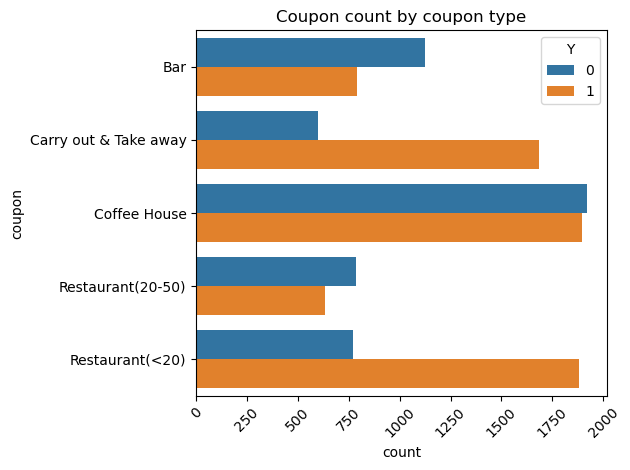

In [ ]:
coupon_count = data.groupby(['coupon', 'Y']).aggregate('count')['destination'].reset_index(name='count')

print(type(coupon_count))
print(coupon_count)


fig_coupon_distribution = sns.barplot(coupon_count, x='count', y='coupon', hue='Coupon_Acceptance', )
plt.xticks(rotation=45)
plt.title('Coupon count by coupon type')
plt.tight_layout()
plt.savefig('images/coupon_count.png')
plt.show()

In [285]:
#print(data.query('Y == 1')[['coupon']].value_counts())

#print(data['coupon'].value_counts())

data.query('Y == 1')[['coupon']].value_counts() / data[['coupon']].value_counts()

coupon               
Coffee House             0.496331
Restaurant(<20)          0.709009
Carry out & Take away    0.737719
Bar                      0.411918
Restaurant(20-50)        0.446013
Name: count, dtype: float64

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

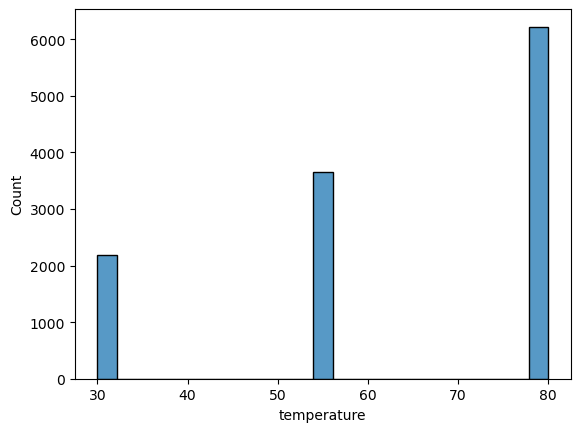

In [286]:
sns.histplot(data, x='temperature')

In [287]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [16]:
bar_coupons = data.query('coupon == "Bar"')
print(bar_coupons.head())
print(bar_coupons.shape)



        destination  passanger weather  temperature  time coupon expiration  \
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   
39             Work      Alone   Sunny           55   7AM    Bar         1d   
46  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
57             Home      Alone   Sunny           55   6PM    Bar         1d   

   gender age maritalStatus  ...  CoffeeHouse CarryAway RestaurantLessThan20  \
24   Male  21        Single  ...        less1       4~8                  4~8   
35   Male  21        Single  ...        less1       4~8                  4~8   
39   Male  21        Single  ...        less1       4~8                  4~8   
46   Male  46        Single  ...          4~8       1~3                  1~3   
57   Male  46        Single  ...          4~8       1~3                  1~3   

   Restaurant20To50 toCoupon_GEQ5min toCoupo

/var/folders/m8/xwy7k01n4rsbswwncxhbmrh00000gn/T/ipykernel_74802/488505597.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons.loc[:, 'Y_str'] = bar_coupons['Y'].map({0:"Rejected", 1:"Accepted"})


array(['Accepted', 'Rejected'], dtype=object)

2. What proportion of bar coupons were accepted?


<class 'numpy.float64'>
788 1913 0.41191845269210664


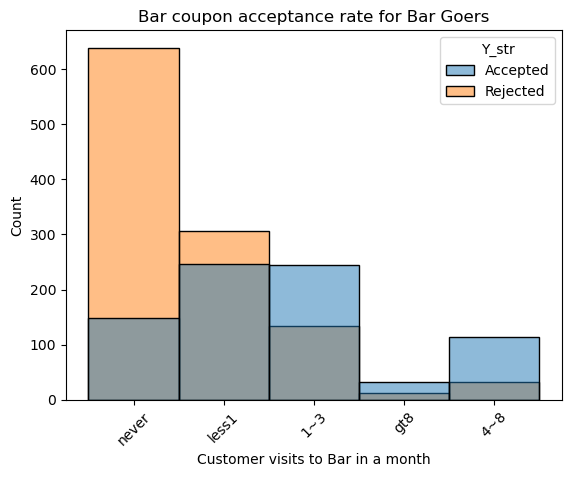

In [25]:
bar_coupon_accp_count = bar_coupons.query('Y == 1').count()['Y'] / bar_coupons.count()['Y']

print(type(bar_coupon_accp_count))
print(bar_coupons.query('Y == 1').count()['Y'], bar_coupons.count()['Y'], bar_coupon_accp_count)

fig_Bar_Coupon_Acceptance = sns.histplot(bar_coupons, x='Bar', hue='Y_str')

plt.title("Bar coupon acceptance rate for Bar Goers")
plt.xlabel("Customer visits to Bar in a month")
plt.ylabel("Count")
plt.xticks(rotation=45)


plt.savefig('images/bar_coupon acceptance.png')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [290]:
bar_coupons['Bar'].value_counts()

Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

In [291]:
lt3_bar_visits = ['never', 'less1', '1~3']

bar_coupon_accp_count_lt3 = bar_coupons.query('Y == 1 and Bar in @lt3_bar_visits').aggregate('count')['Y'] / bar_coupons.query('Bar in @lt3_bar_visits').count()['Y']

print(type(bar_coupon_accp_count_lt3))
print(bar_coupon_accp_count_lt3)

bar_coupon_accp_count_gt3_1 = bar_coupons.query('Y == 1 and Bar not in @lt3_bar_visits').count()['Y'] / bar_coupons.query('Bar not in @lt3_bar_visits').count()['Y']

print(type(bar_coupon_accp_count_gt3_1))
print(bar_coupon_accp_count_gt3_1)

<class 'numpy.float64'>
0.37267441860465117
<class 'numpy.float64'>
0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [292]:
gt_once_a_month = ['1~3', '4~8', 'gt8']
gt_25yrs = ['26', '31', '36', '41', '46', '50plus']

bar_oncemonth_gt25 = bar_coupons.query('Y == 1 and Bar in @gt_once_a_month and age in @gt_25yrs').count()['Y'] / bar_coupons.query('Bar in @gt_once_a_month and age in @gt_25yrs').count()['Y']
not_bar_oncemonth_gt_25 = bar_coupons.query('Y == 1 and not(Bar in @gt_once_a_month) and not(age in @gt_25yrs)').count()['Y'] / bar_coupons.query('not( Bar in @gt_once_a_month) and not(age in @gt_25yrs)').count()['Y']

print(type(bar_oncemonth_gt25), type(not_bar_oncemonth_gt_25))
print(bar_oncemonth_gt25, not_bar_oncemonth_gt_25)

<class 'numpy.float64'> <class 'numpy.float64'>
0.6898263027295285 0.3883495145631068


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [293]:
kid_passenger = ['Kid(s)']
farm_fish_forestry_occp = ['Farming Fishing & Forestry']

bar_oncemonth = bar_coupons.query('Y == 1 and Bar in @gt_once_a_month').count()['Y'] / bar_coupons.query('Bar in @gt_once_a_month').count()['Y']
print(type(bar_oncemonth), bar_oncemonth)

bar_kid_passenger = bar_coupons.query('Y == 1 and passanger in @kid_passenger').count()['Y'] / bar_coupons.query('passanger in @kid_passenger').count()['Y']
print(type(bar_kid_passenger), bar_kid_passenger)

bar_occup_otfarming = bar_coupons.query('Y == 1 and occupation not in @farm_fish_forestry_occp').count()['Y'] / bar_coupons.query('occupation not in @farm_fish_forestry_occp').count()['Y']
print(type(bar_occup_otfarming), bar_occup_otfarming)


<class 'numpy.float64'> 0.6853146853146853
<class 'numpy.float64'> 0.20618556701030927
<class 'numpy.float64'> 0.4117647058823529


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [294]:
scenario1 = 'Bar in @gt_once_a_month and passanger not in @kid_passenger and maritalStatus != "Widowed"'
bar_scenario1 = bar_coupons.query('Y == 1 and ' + scenario1).count()['Y'] / bar_coupons.query(scenario1).count()['Y']
print('Scenario 1:', type(bar_scenario1), bar_scenario1)

scenario2 = 'Bar in @gt_once_a_month and age in ("below21", "21", "26")'
bar_scenario2 = bar_coupons.query('Y == 1 and ' + scenario2).count()['Y'] / bar_coupons.query(scenario2).count()['Y']
print('Scenario 2:', type(bar_scenario2), bar_scenario2)

scenario3 = 'RestaurantLessThan20 in ("4~8", "gt8") and income in ("Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999" )'
bar_scenario3 = bar_coupons.query('Y == 1 and ' + scenario3).count()['Y'] / bar_coupons.query(scenario3).count()['Y']
print('Scenario 3:', type(bar_scenario3), bar_scenario3)


Scenario 1: <class 'numpy.float64'> 0.7094339622641509
Scenario 2: <class 'numpy.float64'> 0.7195121951219512
Scenario 3: <class 'numpy.float64'> 0.45645645645645644


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Coupon Analysis
 1. Little more than half of the drivers accepted coupon.
 2. For Bar, the coupon acceptance rate, about 41%, is the lowest among all type of coupons. 

## Now focusing only on the Bar coupons,
 1. Coupon acceptance rate is very high for drivers who visit bars more than three times per month compare to the drivers who don't. It is almost double. Drivers used to visit bars tend to accept offer more often.
 2. Drivers with age 25 years or higher and also visit bars at least once a month are twice likely to accept bar coupons compare to the drivers who don't meet this criteria.
 3. Drivers with Kids as passenger tend to ignore bar coupons and only accept at about 20% rate.
 4. Widowed drivers don't prefer bar coupons! Drivers who at least once go to bar per month, not having kids as their passengers and are not widowed accepted bar coupon at 70% rate.
 5. Younger drivers, age less than 30, and go to bar at least once a month prefer bar coupons with 70%+ acceptance rate.
 6. Drivers who make less than 50K and prefer cheaper restaurant accept coupons at an average rate.